# **Lineer Regression**

## *Data & Import*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("community_health.csv")

## *About Data*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1000 non-null   int64 
 1   gender          1000 non-null   object
 2   race/ethnicity  1000 non-null   object
 3   weight          1000 non-null   int64 
 4   height          1000 non-null   int64 
 5   visits          1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,45.019,14.839166,0.0,36.0,45.0,55.0,89.0
weight,1000.0,199.045,52.815077,45.0,165.0,197.0,236.0,356.0
height,1000.0,67.300,6.285341,46.0,63.0,67.0,72.0,86.0
visits,1000.0,19.956,6.455055,2.0,15.0,20.0,24.0,40.0


In [5]:
df.isna().sum()

age               0
gender            0
race/ethnicity    0
weight            0
height            0
visits            0
dtype: int64

In [6]:
df.corr(numeric_only=True)

,age,weight,height,visits
age,1.000000,-0.084920,-0.063822,0.539543
weight,-0.084920,1.000000,0.142064,0.543139
height,-0.063822,0.142064,1.000000,-0.385644
visits,0.539543,0.543139,-0.385644,1.000000


## *Data Preparation*

**Relation Between (Gender, Age, Weight, Height) and Visits**

In [7]:
df.head()

,age,gender,race/ethnicity,weight,height,visits
0,47,female,group D,247,65,28
1,26,male,group C,283,66,23
2,26,male,group B,201,68,14
3,39,male,group C,237,73,21
4,55,male,group A,199,61,27


In [8]:
df.head()

,age,gender,race/ethnicity,weight,height,visits
0,47,female,group D,247,65,28
1,26,male,group C,283,66,23
2,26,male,group B,201,68,14
3,39,male,group C,237,73,21
4,55,male,group A,199,61,27


In [9]:
# change weight from lb to kg
df["weight"] = round(df["weight"] * 0.45)

In [10]:
# change height from inch to cm
df["height"] = round(df["height"] * 2.54)

In [11]:
df.head()

,age,gender,race/ethnicity,weight,height,visits
0,47,female,group D,111.0,165.0,28
1,26,male,group C,127.0,168.0,23
2,26,male,group B,90.0,173.0,14
3,39,male,group C,107.0,185.0,21
4,55,male,group A,90.0,155.0,27


In [12]:
df["gender"].unique()

array(['female', 'male'], dtype=object)

In [13]:
# change gender to numerical values
df["gender"].replace({
    "female" : 0,
    "male" : 1
}, inplace=True)

In [14]:
df["race/ethnicity"].unique()

array(['group D', 'group C', 'group B', 'group A', 'group E'],
      dtype=object)

In [15]:
# change ethnicity to numerical values
df["race/ethnicity"].replace({
    "group A" : 0,
    "group B" : 1,
    "group C" : 2,
    "group D" : 3,
    "group E" : 4,
}, inplace=True)

In [16]:
df.head()

,age,gender,race/ethnicity,weight,height,visits
0,47,0,3,111.0,165.0,28
1,26,1,2,127.0,168.0,23
2,26,1,1,90.0,173.0,14
3,39,1,2,107.0,185.0,21
4,55,1,0,90.0,155.0,27


In [17]:
# save the dataframe
df.to_csv("community_health_MLR.csv", index=False)

## *Train Test Split*

In [18]:
X = df.drop("visits", axis=1)
y = df["visits"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [21]:
X_train.head()

,age,gender,race/ethnicity,weight,height
26,45,0,3,100.0,196.0
155,21,1,4,84.0,178.0
872,47,1,1,62.0,178.0
383,64,0,3,72.0,173.0
648,50,1,2,93.0,163.0


In [22]:
y_train.head()

26     18
155     8
872    18
383    20
648    24
Name: visits, dtype: int64

## *Scikit Learn*

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regr = LinearRegression()

In [25]:
regr.fit(X_train, y_train)

LinearRegression()

## *Prediction*

In [26]:
test_preds = regr.predict(X_test)

In [27]:
test_preds

array([25.47287336, 16.34545747, 15.96774389, 12.55665556, 28.94801448,
       12.35876421, 18.3300025 , 12.88470601, 25.88269661, 16.54034389,
       14.575362  , 17.39199018, 16.87788289, 17.10361996, 28.67505763,
       12.49395624, 17.32279133, 22.80152606, 24.63576961, 11.28157707,
       10.92664001, 30.68800454, 20.43021187, 17.19895224, 23.04190113,
       23.04579988, 22.17555941, 15.07798902, 30.69408062, 14.93853304,
       18.35996377, 27.89919367, 22.79782893, 28.79354921, 27.20269343,
       13.06444182, 18.2764939 , 20.97413184, 10.59746303, 24.24034679,
       19.40191897, 18.56565253, 24.97283579, 21.1238621 , 13.43515292,
       16.34325795, 25.28669123,  8.75706466, 19.84670346, 25.91882601,
       20.75334454, 24.20812058, 23.26085752, 16.73120977,  7.90752518,
       17.95969006, 13.76233617, 17.40203474, 29.32279488, 20.62019387,
       21.52168162, 19.1231761 , 13.45239364, 25.22222198, 18.20434586,
       13.91206643, 19.56291105, 14.16214579, 16.11663239, 35.20

## *Performance*

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
print("Theta     : ", round(regr.coef_[0], 2))
print("Intercept : ", round(regr.intercept_, 2))
print("R^2       : ", round(r2_score(y_test, test_preds), 2))
print("MAE       : ", round(mean_absolute_error(y_test, test_preds), 2))
print("RMSE      : ", round(np.sqrt(mean_squared_error(y_test, test_preds)), 2))

Theta     :  0.25
Intercept :  22.82
R^2       :  0.84
MAE       :  2.24
RMSE      :  2.64


**This model is more consistent than the last one.**

In [30]:
df["visits"].mean()

19.956

In [31]:
df["visits"].std()

6.455054742737023

## *Final*

**Our model is more consistent than the last one, so we can use X and y to perform the model.**

In [32]:
final = LinearRegression()

In [33]:
final.fit(X, y)

LinearRegression()

In [34]:
y_hat = final.predict(X)

In [35]:
coef_df = pd.DataFrame(final.coef_, X.columns, columns=["Coeficcients"])

In [36]:
coef_df

,Coeficcients
age,0.246329
gender,0.098397
race/ethnicity,0.014960
weight,0.177158
height,-0.180013


**Age, Gender and Ethnicity => Low Relation**

**Weight and Height => Low Relation but Higher than Others**

## *Example*

In [37]:
print(df["age"].mean())
print(df["gender"].mean())
print(df["race/ethnicity"].mean())
print(df["weight"].mean())
print(df["height"].mean())

45.019
0.481
2.155
89.574
170.914


In [38]:
exp = [[22, 0, 1, 43, 157]]

In [39]:
final.predict(exp)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.47488648])

In [40]:
X.iloc[44]

age                43.0
gender              1.0
race/ethnicity      1.0
weight             82.0
height            193.0
Name: 44, dtype: float64

In [41]:
exp_1 = [[43, 1, 1, 82, 193]]

In [42]:
exp_1_predict = final.predict(exp_1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
exp_1_predict[0]

14.174887394587346

In [44]:
y.iloc[44]

15

In [45]:
# save the model
from joblib import dump, load

dump(final, "final_model_visits.joblib")

['final_model_visits.joblib']

In [46]:
'''
# load the model
model = load("final_model_visits.joblib")
'''

'\n# load the model\nmodel = load("final_model_visits.joblib")\n'

## *Residual & Visualization*

In [47]:
residuals = y_hat - y

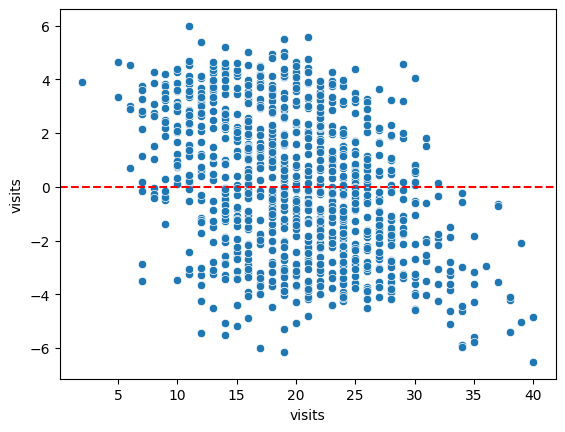

In [48]:
sns.scatterplot(x=y, y=residuals)
plt.axhline(y= 0, color="r", ls="--")

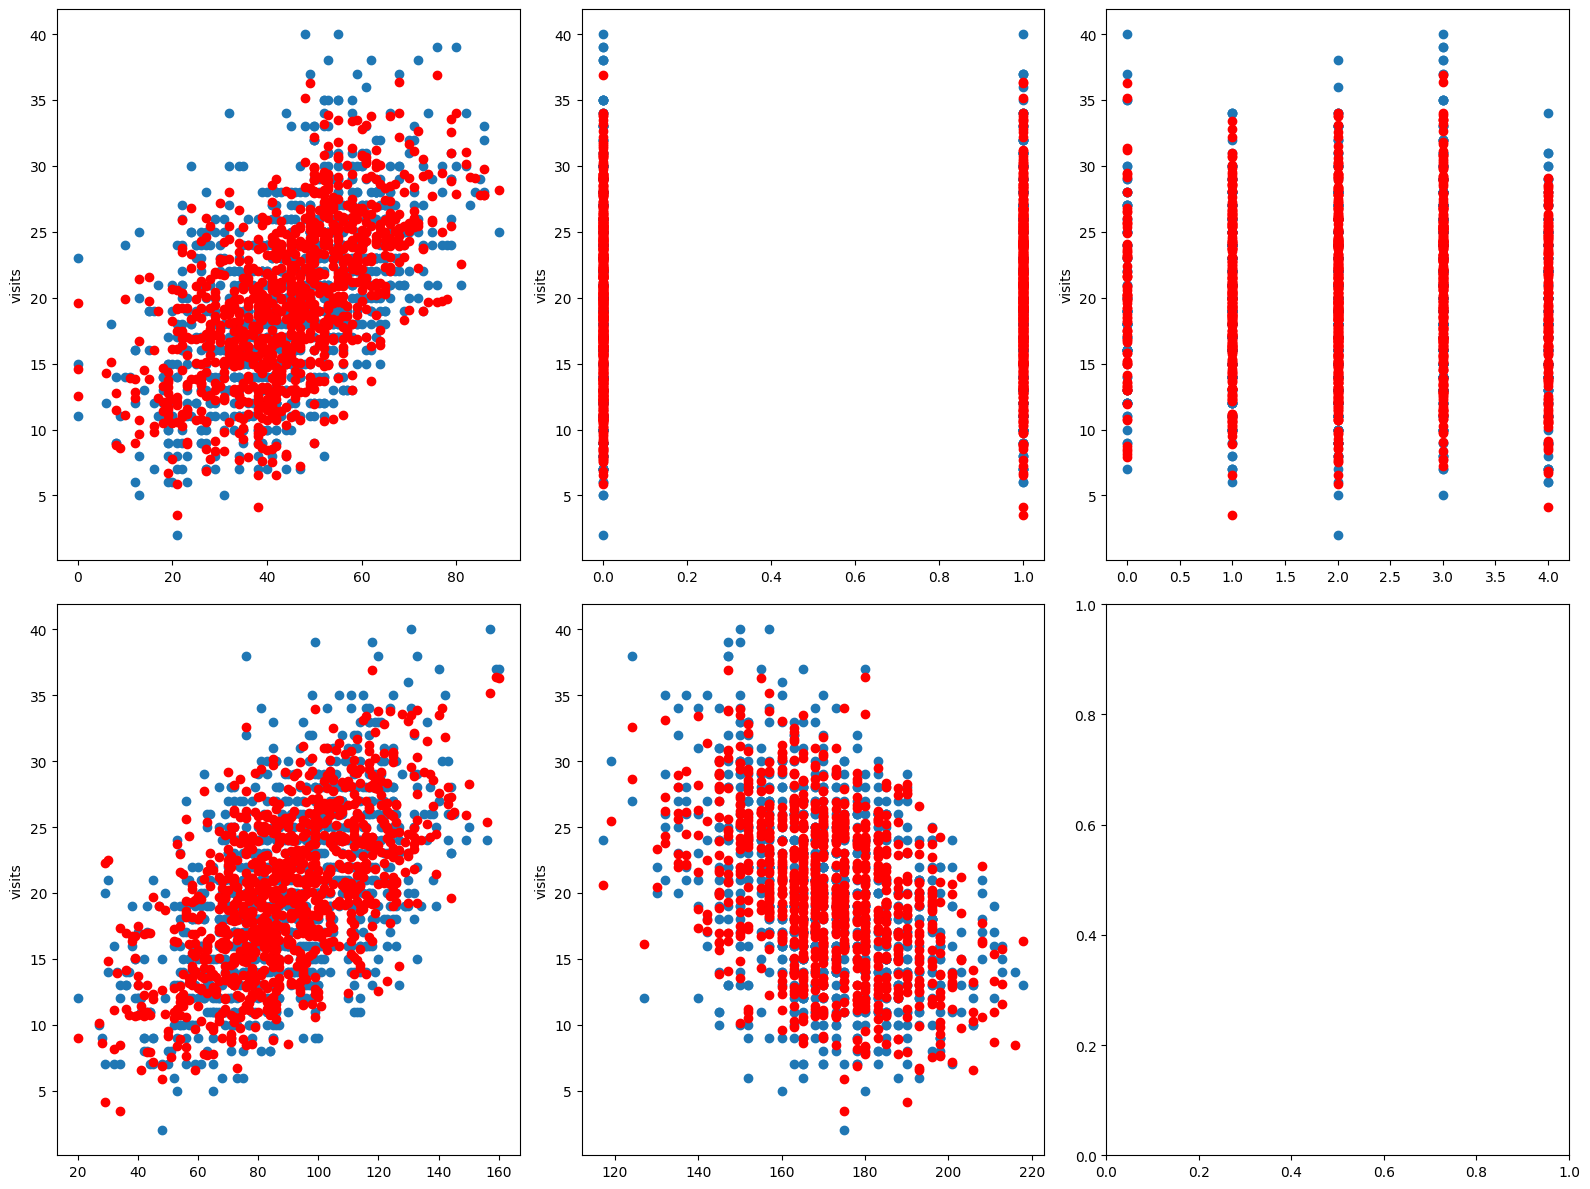

In [49]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(16,12))

axes[0,0].plot(df['age'],df['visits'],'o')
axes[0,0].plot(df['age'],y_hat,'o',color='red')
axes[0,0].set_ylabel("visits")

axes[0,1].plot(df['gender'],df['visits'],'o')
axes[0,1].plot(df['gender'],y_hat,'o',color='red')
axes[0,1].set_ylabel("visits")

axes[0,2].plot(df['race/ethnicity'],df['visits'],'o')
axes[0,2].plot(df['race/ethnicity'],y_hat,'o',color='red')
axes[0,2].set_ylabel("visits")

axes[1,0].plot(df['weight'],df['visits'],'o')
axes[1,0].plot(df['weight'],y_hat,'o',color='red')
axes[1,0].set_ylabel("visits")

axes[1,1].plot(df['height'],df['visits'],'o')
axes[1,1].plot(df['height'],y_hat,'o',color='red')
axes[1,1].set_ylabel("visits")

plt.tight_layout();